# Analysis of Hate Crimes in the United States

### Introduction and Background

Hate crime statistics were downloaded from the Federal Bureau of Investigation (FBI) Crime Data Explorer (CDE). The data contain hate crimes reported between 1991 and 2020. All data are at the incident level. The FBI defines a hate crime as a crime that is "motivated in whole, or in part, by an offender’s bias against the victim’s perceived race, gender, gender identity, religion, disability, sexual orientation, or ethnicity."

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Import csv file from FBI CDE website
fbi_crime = "hate_crime.csv"
hate_crime_df = pd.read_csv(fbi_crime, low_memory=False)

### Initial Exploration of Data

In [3]:
# View data frame
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [5]:
# Describe the numeric variables in the data set
hate_crime_df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,2.195770e+05,219577.000000,51411.000000,49539.000000,219577.000000,47130.000000,47123.000000,219577.000000,216098.000000
mean,2.080389e+05,2005.472691,0.658867,0.085327,0.955724,0.548207,0.099081,1.247567,0.984715
std,3.251394e+05,8.591466,1.238581,0.513304,1.358364,0.844695,0.482898,2.274116,1.173726
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.489600e+04,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.097900e+05,2005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.646850e+05,2013.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.358628e+06,2020.000000,146.000000,60.000000,99.000000,60.000000,20.000000,900.000000,147.000000


In [11]:
# Display all variable names
print(hate_crime_df.columns)

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')


In [ ]:
# Filter by year (2010 - 2020)
 #- Can also do by decade
# Group by region to see if some regions are different from others
# How many are multiple offenses vs single?
# Possibly get mean, std, and max for victim_count

In [12]:
# What regions do we have?
hate_crime_df['REGION_NAME'].unique()

array(['South', 'West', 'Northeast', 'Midwest', 'U.S. Territories',
       'Other'], dtype=object)

In [13]:
# Group by race
hate_crime_df.groupby('OFFENDER_RACE').count()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
OFFENDER_RACE,,,,,,,,,,,,,,,,,,,,,
American Indian or Alaska Native,1211,1211,1211,1211,19,1211,1211,1211,1211,1211,...,365,245,1211,1211,1208,1211,1211,1211,1211,1211
Asian,1596,1596,1596,1596,52,1596,1596,1596,1596,1596,...,385,243,1596,1596,1582,1596,1596,1596,1596,1596
Black or African American,28507,28507,28507,28507,448,28507,28507,28507,28507,28507,...,8039,5277,28507,28507,28421,28507,28507,28507,28507,28507
Multiple,4423,4423,4423,4423,85,4423,4423,4423,4423,4423,...,1324,874,4423,4423,4367,4423,4423,4423,4423,4423
Native Hawaiian or Other Pacific Islander,83,83,83,83,3,83,83,83,83,83,...,79,67,83,83,78,83,83,83,83,83
Unknown,97334,97334,97334,97334,3878,97334,97334,97334,97334,97334,...,15844,14658,97334,97334,94370,97334,97334,97334,97334,97334
White,86403,86403,86403,86403,1945,86403,86403,86403,86403,86403,...,21067,13492,86403,86403,86052,86403,86403,86403,86403,86403


In [12]:
# Group by region
fbi_region = hate_crime_df.groupby('REGION_NAME')

fbi_region_df = pd.DataFrame({'Region':})
fbi_region_df

,0,1
0,Midwest,INCIDENT_ID DATA_YEAR ORI PUB_...
1,Northeast,INCIDENT_ID DATA_YEAR ORI PUB_...
2,Other,INCIDENT_ID DATA_YEAR ORI \ 1...
3,South,INCIDENT_ID DATA_YEAR ORI PUB_...
4,U.S. Territories,INCIDENT_ID DATA_YEAR ORI PUB_...
5,West,INCIDENT_ID DATA_YEAR ORI PUB_...


In [14]:
fbi_region_date = hate_crime_df.groupby(['DATA_YEAR', 'REGION_NAME'])

In [5]:
# Group by year
hate_crime_df.groupby('DATA_YEAR').count()

,INCIDENT_ID,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
DATA_YEAR,,,,,,,,,,,,,,,,,,,,,
1991,4589,4589,4589,127,4589,4589,4589,4589,4589,4589,...,4589,0,4589,4589,4589,4589,4589,4589,4589,4589
1992,6667,6667,6667,199,6667,6667,6667,6667,6667,6667,...,6667,0,6667,6667,6667,6667,6667,6667,6667,6667
1993,7608,7608,7608,273,7608,7608,7608,7608,7608,7608,...,7608,0,7608,7608,7608,7608,7608,7608,7608,7608
1994,5954,5954,5954,231,5954,5954,5954,5954,5954,5954,...,5954,0,5954,5954,5954,5954,5954,5954,5954,5954
1995,7950,7950,7950,285,7950,7950,7950,7950,7950,7950,...,7950,0,7950,7950,7950,7950,7950,7950,7950,7950
1996,8790,8790,8790,217,8790,8790,8790,8790,8790,8790,...,8790,0,8790,8790,8790,8790,8790,8790,8790,8790
1997,8107,8107,8107,211,8107,8107,8107,8107,8107,8107,...,8107,0,8107,8107,8107,8107,8107,8107,8107,8107
1998,7902,7902,7902,173,7902,7902,7902,7902,7902,7902,...,7902,0,7902,7902,7902,7902,7902,7902,7902,7902
1999,7944,7944,7944,268,7944,7944,7944,7944,7944,7944,...,7944,1,7944,7944,7944,7944,7944,7944,7944,7944


In [8]:
# Import module
import openpyxl

# Import census data from https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html
census = "Census-Population-by-Region.xlsx"
census_df = pd.read_excel(census)

In [9]:
# Display the populations 
census_df.head()

,State or Region,2020.0,2010.0,2000.0,1990.0,1980.0,1970.0,1960.0,1950.0,1940.0,1930.0,1920.0
0,Northeast,57609148.0,55317240.0,53594378.0,50809229.0,49135283.0,49040703.0,44677819.0,39477986.0,35976777.0,34427091.0,29662053.0
1,Midwest,68985454.0,66927001.0,64392776.0,59668632.0,58865670.0,56571663.0,51619139.0,44460762.0,40143332.0,38594100.0,34019792.0
2,South,126266107.0,114555744.0,100236820.0,85445930.0,75372362.0,62795367.0,54973113.0,47197088.0,41665901.0,37857633.0,33125803.0
3,West,78588572.0,71945553.0,63197932.0,52786082.0,43172490.0,34804193.0,28053104.0,20189962.0,14379119.0,12323836.0,9213920.0


# Research Questions

### How much more likely is a single offense vs. multiple offenses?

In [18]:
# Group by 'multiple offense' to see if multiple or single offenses are more common
# Count by incident_id to obtain total values
offense_type = hate_crime_df.groupby('MULTIPLE_OFFENSE')['INCIDENT_ID'].count()
offense_type

MULTIPLE_OFFENSE
M      9720
S    209857
Name: INCIDENT_ID, dtype: int64

In [19]:
# Group by 'multiple bias' to see if multiple or single biases are more common
# Count by incident_id to obtain total values
bias_type = hate_crime_df.groupby('MULTIPLE_BIAS')['INCIDENT_ID'].count()
bias_type

MULTIPLE_BIAS
M      1019
S    218558
Name: INCIDENT_ID, dtype: int64

In [24]:
# Create a data frame that displays the counts of multiple offense vs. single offense, as well as the counts for multiple
  # bias vs. single bias. Also include the proportions for both, so that it is easier to interpret. 
offense_bias = pd.DataFrame({'Offense':offense_type,
                            'Proportion_Offense':offense_type/sum(offense_type),
                             'Bias':bias_type,
                             'Proportion_Bias':bias_type/sum(bias_type)
                            })
offense_bias

,Offense,Proportion_Offense,Bias,Proportion_Bias
M,9720,0.044267,1019,0.004641
S,209857,0.955733,218558,0.995359


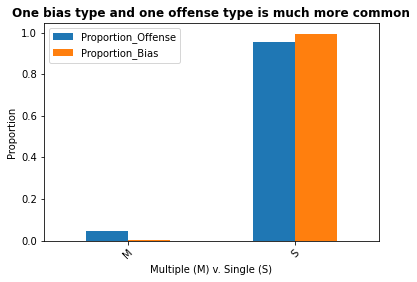

In [28]:
# Create the bar plot
offense_bias[['Proportion_Offense', 'Proportion_Bias']].plot(kind='bar', 
                                       xlabel='Multiple (M) v. Single (S)',
                                       ylabel='Proportion')
plt.xticks(rotation=45)
plt.title('One bias type and one offense type is much more common', fontsize=12, fontweight='bold')

# Display our chart
plt.show()

In [ ]:
## Run a Chi square analysis to test multiple offense (y/n) with multiple bias (y/n) liklihood? 

### What is the average victim count? What is the standard deviation, maximum and minimum counts?

In [ ]:
# Plot average victim count over time?


# Maybe box plots that show distribution of victim counts? 

In [35]:
# Describe the victim count variable in the data set
hate_crime_df['VICTIM_COUNT'].describe()

# The average victim count for hate crimes is 1.25 with a standard deviation of 2.27.
# The max number of victims is 900. This prompts a follow-up question of 'how many incidents involve more than 1 victim'?

count    219577.000000
mean          1.247567
std           2.274116
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         900.000000
Name: VICTIM_COUNT, dtype: float64

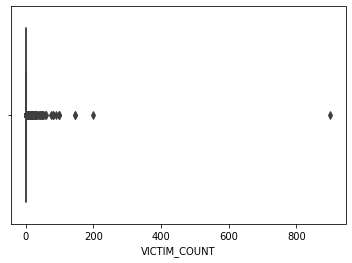

In [60]:
# Look at distribution with box plot
ax = sns.boxplot(x=hate_crime_df['VICTIM_COUNT'])

In [41]:
# Sort by hate crime ascending to see higher victim counts
hate_crime_df.sort_values('VICTIM_COUNT', ascending=False).head()

# This initial scan displays that some hate crimes involve hundreds of victims. But how common is that?

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
214179,909383,2020,NB0550100,Lincoln,NaN,City,NB,Nebraska,West North Central,Midwest,...,White,NaN,900,Intimidation,1.0,Grocery/Supermarket,Anti-Lesbian (Female),Individual,S,S
188869,190211,2017,GA0670200,Gwinnett County Police Department,NaN,County,GA,Georgia,South Atlantic,South,...,Unknown,NaN,200,Intimidation;Simple Assault,100.0,Church/Synagogue/Temple/Mosque,"Anti-Islamic (Muslim);Anti-Multiple Races, Group",Individual,M,M
54279,52221,1998,MT0510000,Toole,NaN,County,MT,Montana,Mountain,West,...,Unknown,NaN,147,Arson,147.0,Residence/Home,Anti-Other Religion,Individual,S,S
211834,1329375,2020,WAFBISE00,Federal Bureau of Investigation,Seattle,Federal,FS,Federal,Other,Other,...,Unknown,Unknown,146,Intimidation,146.0,Cyberspace,Anti-Black or African American,Individual,S,S
19305,22703,1994,CA0380100,San Francisco,NaN,City,CA,California,Pacific,West,...,Unknown,NaN,100,Intimidation,100.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,S,S


In [38]:
# Check to see when a victim count is great than 1
victim_count =  hate_crime_df['VICTIM_COUNT']>1
victim_count.head()

0    False
1    False
2    False
3     True
4    False
Name: VICTIM_COUNT, dtype: bool

In [40]:
# Create a new data frame that only has victim counts greater than 1.
multiple_victim = hate_crime_df[victim_count]
multiple_victim.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
27,17,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Aggravated Assault,3.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S
33,23,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Destruction/Damage/Vandalism of Property;Intim...,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,M,S


In [42]:
# Describe the victim count variable when greater than 1
multiple_victim['VICTIM_COUNT'].describe() # Now we have a mean of 2.63

count    33377.000000
mean         2.628666
std          5.636829
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        900.000000
Name: VICTIM_COUNT, dtype: float64

In [45]:
# Check to see how common other victim counts are
# Group by victim count to see
grouped_victim = multiple_victim.groupby('VICTIM_COUNT').count() # Now we have a mean of 2.63
grouped_victim

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
VICTIM_COUNT,,,,,,,,,,,,,,,,,,,,,
2,24674,24674,24674,24674,599,24674,24674,24674,24674,24674,...,5252,24674,3752,24674,24640,24674,24674,24674,24674,24674
3,4925,4925,4925,4925,124,4925,4925,4925,4925,4925,...,1073,4925,747,4925,4917,4925,4925,4925,4925,4925
4,1980,1980,1980,1980,57,1980,1980,1980,1980,1980,...,422,1980,288,1980,1977,1980,1980,1980,1980,1980
5,706,706,706,706,27,706,706,706,706,706,...,146,706,104,706,706,706,706,706,706,706
6,424,424,424,424,13,424,424,424,424,424,...,73,424,48,424,424,424,424,424,424,424
7,150,150,150,150,5,150,150,150,150,150,...,33,150,22,150,150,150,150,150,150,150
8,130,130,130,130,6,130,130,130,130,130,...,33,130,21,130,130,130,130,130,130,130
9,72,72,72,72,6,72,72,72,72,72,...,23,72,19,72,72,72,72,72,72,72
10,121,121,121,121,6,121,121,121,121,121,...,8,121,5,121,121,121,121,121,121,121


In [48]:
# Establish bins and bin labels for victim counts
victim_bins = [2, 9, 20, 30, 40, 50, 900]
victim_labels = ['2-10', '11-20', '21-30', '31-40', '41-50', '50+']


grouped_victim['INCIDENT_ID'] = pd.cut(grouped_victim["INCIDENT_ID"], victim_bins, labels=victim_labels)

In [57]:
# Group by the incident_id variable
victim_group = grouped_victim.groupby('INCIDENT_ID')
victim_group

# Get the total victims per bin in order to compare
victim_counts = victim_group.agg({"TOTAL_INDIVIDUAL_VICTIMS": 'sum'})
victim_counts

,TOTAL_INDIVIDUAL_VICTIMS
INCIDENT_ID,
2-10,51
11-20,40
21-30,45
31-40,31
41-50,0
50+,1603


In [59]:
victim_group.sum()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
INCIDENT_ID,,,,,,,,,,,,,,,,,,,,,
2-10,51,51,51,5,51,51,51,51,51,51,...,14,51,8,51,51,51,51,51,51,51
11-20,40,40,40,8,40,40,40,40,40,40,...,12,40,8,40,40,40,40,40,40,40
21-30,45,45,45,3,45,45,45,45,45,45,...,10,45,9,45,45,45,45,45,45,45
31-40,31,31,31,1,31,31,31,31,31,31,...,3,31,2,31,31,31,31,31,31,31
41-50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50+,1603,1603,1603,63,1603,1603,1603,1603,1603,1603,...,316,1603,219,1603,1603,1603,1603,1603,1603,1603
